# Observations and Analysis of World Weather

1. This analysis is based on the current forecast (7/23/18) at 10:33 EST of 818 randomly selected cities 

2. In general, cities that are closer to the equator tend to have warmer temperatures; Cities that are further from the equator (regardless of direction) tend to have cooler temperatures.

3. Humidity, Cloudiness, and Wind Speed have a weak correlation with latitude; Other geographical factors may be responsible for these variations.

# Further Research 

1. This analysis measures climate data at a specific time (Eastern Standard Time). This is problematic due to night and day differences between cities around the world. In order to account for these differences, daytime temperatures should be measured and compared for all cities. This would give a more accurate result of temperatures relative to the equator. 

2. This analysis ignores seasonal temperature variation. A more accurate analysis would account for the different seasons in the northern and southern hemispheres, which would allow us to compare temperatures of cities in the same season. This analysis would also show how temperatures vary between seasons of cities relative to the equator.

3. This analysis includes all cities between the north and south poles. Segregating cities by latitude may give us new insights into city climate between particular latitudes, and would allow us to compare groups of cities. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

904

# Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# at what time point am I measuring this data? cannot use historical data (pricing)
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0


In [5]:
# Create an empty list to store the responses
response_json = []

# Make a request for each of the cities
for x in range(len(cities)):
    print(f"Making request: City number {x+1} of {len(cities)} | City Name: {cities[x].title()}")
    print(f"{url}&q={str(cities[x])}")
    # Get one of the posts
    post_response = requests.get(url + "&q=" + str(cities[x]))

    # Save post's JSON
    response_json.append(post_response.json())


Making request: City number 1 of 904 | City Name: Fengzhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=fengzhen
Making request: City number 2 of 904 | City Name: Puri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=puri
Making request: City number 3 of 904 | City Name: Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=jamestown
Making request: City number 4 of 904 | City Name: Pedra Azul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=pedra azul
Making request: City number 5 of 904 | City Name: Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=labuhan
Making request: City number 6 of 904 | City Name: Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee

Making request: City number 49 of 904 | City Name: Artyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=artyk
Making request: City number 50 of 904 | City Name: Madang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=madang
Making request: City number 51 of 904 | City Name: Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=cherskiy
Making request: City number 52 of 904 | City Name: Nisia Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=nisia floresta
Making request: City number 53 of 904 | City Name: Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=saskylakh
Making request: City number 54 of 904 | City Name: Pirapemas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85

Making request: City number 98 of 904 | City Name: Kudymkar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kudymkar
Making request: City number 99 of 904 | City Name: Cooma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=cooma
Making request: City number 100 of 904 | City Name: Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=laguna
Making request: City number 101 of 904 | City Name: Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=cockburn town
Making request: City number 102 of 904 | City Name: Yazd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=yazd
Making request: City number 103 of 904 | City Name: Kachkanar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb

Making request: City number 146 of 904 | City Name: Moratuwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=moratuwa
Making request: City number 147 of 904 | City Name: Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=ayan
Making request: City number 148 of 904 | City Name: Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=trairi
Making request: City number 149 of 904 | City Name: Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=te anau
Making request: City number 150 of 904 | City Name: Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kavieng
Making request: City number 151 of 904 | City Name: Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb355

Making request: City number 195 of 904 | City Name: Barceloneta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=barceloneta
Making request: City number 196 of 904 | City Name: Acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=acapulco
Making request: City number 197 of 904 | City Name: Kabelvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kabelvag
Making request: City number 198 of 904 | City Name: Jaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=jaque
Making request: City number 199 of 904 | City Name: Oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=oktyabrskoye
Making request: City number 200 of 904 | City Name: Kathmandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Making request: City number 244 of 904 | City Name: Holetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=holetown
Making request: City number 245 of 904 | City Name: Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=baykit
Making request: City number 246 of 904 | City Name: Samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=samusu
Making request: City number 247 of 904 | City Name: Misratah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=misratah
Making request: City number 248 of 904 | City Name: Burgersdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=burgersdorp
Making request: City number 249 of 904 | City Name: Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921

Making request: City number 293 of 904 | City Name: Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kamenka
Making request: City number 294 of 904 | City Name: Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=qasigiannguit
Making request: City number 295 of 904 | City Name: Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=chuy
Making request: City number 296 of 904 | City Name: Gradistea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=gradistea
Making request: City number 297 of 904 | City Name: Ibicui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=ibicui
Making request: City number 298 of 904 | City Name: Umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85

Making request: City number 341 of 904 | City Name: Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=paamiut
Making request: City number 342 of 904 | City Name: Kungurtug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kungurtug
Making request: City number 343 of 904 | City Name: Wamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=wamba
Making request: City number 344 of 904 | City Name: San Marco In Lamis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=san marco in lamis
Making request: City number 345 of 904 | City Name: Ginir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=ginir
Making request: City number 346 of 904 | City Name: Ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Making request: City number 389 of 904 | City Name: Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=hualmay
Making request: City number 390 of 904 | City Name: Fuyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=fuyang
Making request: City number 391 of 904 | City Name: Arica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=arica
Making request: City number 392 of 904 | City Name: South Yuba City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=south yuba city
Making request: City number 393 of 904 | City Name: Moindou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=moindou
Making request: City number 394 of 904 | City Name: Mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e8592

Making request: City number 439 of 904 | City Name: Rock Sound
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=rock sound
Making request: City number 440 of 904 | City Name: Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=aykhal
Making request: City number 441 of 904 | City Name: Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=gat
Making request: City number 442 of 904 | City Name: Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=dingle
Making request: City number 443 of 904 | City Name: Porto Walter
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=porto walter
Making request: City number 444 of 904 | City Name: Mountain Home
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85

Making request: City number 487 of 904 | City Name: Cowra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=cowra
Making request: City number 488 of 904 | City Name: Koumac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=koumac
Making request: City number 489 of 904 | City Name: General Pico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=general pico
Making request: City number 490 of 904 | City Name: Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=sinnamary
Making request: City number 491 of 904 | City Name: Isiolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=isiolo
Making request: City number 492 of 904 | City Name: Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e859217

Making request: City number 536 of 904 | City Name: Paralion Astros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=paralion astros
Making request: City number 537 of 904 | City Name: Lawton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=lawton
Making request: City number 538 of 904 | City Name: Dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=dicabisagan
Making request: City number 539 of 904 | City Name: Asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=asau
Making request: City number 540 of 904 | City Name: Nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=nador
Making request: City number 541 of 904 | City Name: Chebenki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7

Making request: City number 585 of 904 | City Name: Malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=malanje
Making request: City number 586 of 904 | City Name: Toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=toliary
Making request: City number 587 of 904 | City Name: Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=grand gaube
Making request: City number 588 of 904 | City Name: Jadu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=jadu
Making request: City number 589 of 904 | City Name: Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=shingu
Making request: City number 590 of 904 | City Name: Kandi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554

Making request: City number 633 of 904 | City Name: Mabaruma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=mabaruma
Making request: City number 634 of 904 | City Name: Halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=halalo
Making request: City number 635 of 904 | City Name: Tall Kayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=tall kayf
Making request: City number 636 of 904 | City Name: Sapao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=sapao
Making request: City number 637 of 904 | City Name: Palu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=palu
Making request: City number 638 of 904 | City Name: Coaldale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee2

Making request: City number 681 of 904 | City Name: Coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=coahuayana
Making request: City number 682 of 904 | City Name: Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kloulklubed
Making request: City number 683 of 904 | City Name: Kanye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kanye
Making request: City number 684 of 904 | City Name: Cape Coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=cape coast
Making request: City number 685 of 904 | City Name: Dzaoudzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=dzaoudzi
Making request: City number 686 of 904 | City Name: Willowmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Making request: City number 729 of 904 | City Name: Katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=katobu
Making request: City number 730 of 904 | City Name: La Paz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=la paz
Making request: City number 731 of 904 | City Name: Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=takoradi
Making request: City number 732 of 904 | City Name: Aranos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=aranos
Making request: City number 733 of 904 | City Name: Morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=morondava
Making request: City number 734 of 904 | City Name: Sept-Iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb

Making request: City number 778 of 904 | City Name: Puerto Leguizamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=puerto leguizamo
Making request: City number 779 of 904 | City Name: Louisbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=louisbourg
Making request: City number 780 of 904 | City Name: Kegayli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=kegayli
Making request: City number 781 of 904 | City Name: Zomin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=zomin
Making request: City number 782 of 904 | City Name: Mont-Dore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=mont-dore
Making request: City number 783 of 904 | City Name: Awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Making request: City number 826 of 904 | City Name: Vila Do Maio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=vila do maio
Making request: City number 827 of 904 | City Name: Zabol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=zabol
Making request: City number 828 of 904 | City Name: Nong Ki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=nong ki
Making request: City number 829 of 904 | City Name: Saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=saleaula
Making request: City number 830 of 904 | City Name: Boddam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=boddam
Making request: City number 831 of 904 | City Name: Groa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763c

Making request: City number 874 of 904 | City Name: Vinh Long
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=vinh long
Making request: City number 875 of 904 | City Name: Manbij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=manbij
Making request: City number 876 of 904 | City Name: Oskemen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=oskemen
Making request: City number 877 of 904 | City Name: Nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=nishihara
Making request: City number 878 of 904 | City Name: Nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85921763cb3554ee22e7750d5a0&q=nhulunbuy
Making request: City number 879 of 904 | City Name: Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4eb7e85

In [6]:
response_json

[{'coord': {'lon': 113.15, 'lat': 40.43},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 67.15,
   'pressure': 883.6,
   'humidity': 79,
   'temp_min': 67.15,
   'temp_max': 67.15,
   'sea_level': 1018.68,
   'grnd_level': 883.6},
  'wind': {'speed': 5.37, 'deg': 132.001},
  'clouds': {'all': 0},
  'dt': 1532356401,
  'sys': {'message': 0.0036,
   'country': 'CN',
   'sunrise': 1532294198,
   'sunset': 1532346639},
  'id': 2037391,
  'name': 'Fengzhen',
  'cod': 200},
 {'coord': {'lon': 112.45, 'lat': -7.54},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'base': 'stations',
  'main': {'temp': 82.4,
   'pressure': 1010,
   'humidity': 74,
   'temp_min': 82.4,
   'temp_max': 82.4},
  'visibility': 8000,
  'wind': {'speed': 11.41, 'deg': 70},
  'clouds': {'all': 20},
  'dt': 1532350800,
  'sys': {'type': 1,
   'id': 8024,
   'message': 0.0

In [7]:
# Some cities are not found in OpenWeatherMap so we need to remove based on '404' error message

response_json = [response for response in response_json if response['cod'] != '404']
len(response_json)

818

In [8]:
# loop through the responses and save the items in arrays
city_name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = [] # in F
main_temp = [] # in F
wind_speed = [] # in mph

for response in response_json:

    # Save corresponding information we are interested in    

    city_name.append(response['name'])
    clouds.append(response['clouds']['all']) # cloudiness %
    country.append(response['sys']['country'])
    date.append(response['dt']) # time of data calculation, unix, DTC
    humidity.append(response['main']['humidity']) # as %
    max_temp.append(response['main']['temp_max']) # Maximum temperature at the moment. 
    main_temp.append(response['main']['temp']) # main temperature
    wind_speed.append(response['wind']['speed']) # in MPH
    lng.append(response['coord']['lon'])
    lat.append(response['coord']['lat'])

In [9]:
city_data_df = pd.DataFrame()
city_data_df['City Name'] = city_name
city_data_df['Country'] = country
city_data_df['Date'] = date
city_data_df['Main Temp. (in F)'] = main_temp
city_data_df['Max Temp. (in F)'] = max_temp
city_data_df['Cloudiness (in %)'] = clouds
city_data_df['Humidity (in %)'] = humidity
city_data_df['Wind Speed (in MPH)'] = wind_speed
city_data_df['Latitude'] = lat
city_data_df['Longitude'] = lng

In [33]:
city_data_df.to_csv('City Weather Data.csv')
city_data_df

,City Name,Country,Date,Main Temp. (in F),Max Temp. (in F),Cloudiness (in %),Humidity (in %),Wind Speed (in MPH),Latitude,Longitude
0,Fengzhen,CN,1532356401,67.15,67.15,0,79,5.37,40.43,113.15
1,Puri,ID,1532350800,82.40,82.40,20,74,11.41,-7.54,112.45
2,Jamestown,AU,1532356401,52.12,52.12,20,73,13.65,-33.21,138.60
3,Pedra Azul,BR,1532356402,71.29,71.29,44,67,8.95,-16.01,-41.28
4,Labuhan,ID,1532356402,73.72,73.72,8,89,3.02,-2.54,115.51
5,Busselton,AU,1532356402,62.74,62.74,88,100,18.79,-33.64,115.35
6,Ketchikan,US,1532354340,54.18,55.40,90,93,4.70,55.34,-131.65
7,Rikitea,PF,1532356402,74.62,74.62,36,99,20.02,-23.12,-134.97
8,Boysun,UZ,1532356403,79.39,79.39,0,21,2.24,38.20,67.20
9,Arraial do Cabo,BR,1532354400,77.88,78.80,20,74,9.17,-22.97,-42.02


# City Latitude vs. Max Temperature

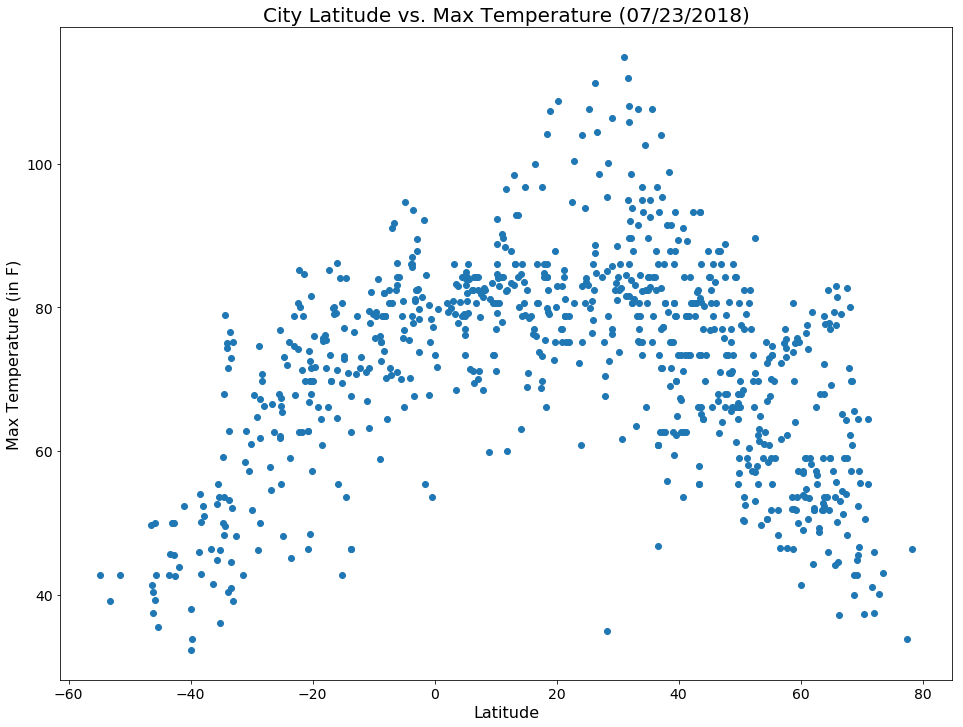

In [26]:
fig = plt.figure(figsize=(16,12))
plt.scatter(x=city_data_df['Latitude'],y=city_data_df['Max Temp. (in F)'])
plt.title('City Latitude vs. Max Temperature (07/23/2018)',fontsize=20)
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Max Temperature (in F)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Charts/LatMaxTemp.png")
plt.show()

# City Latitude vs. Humidity

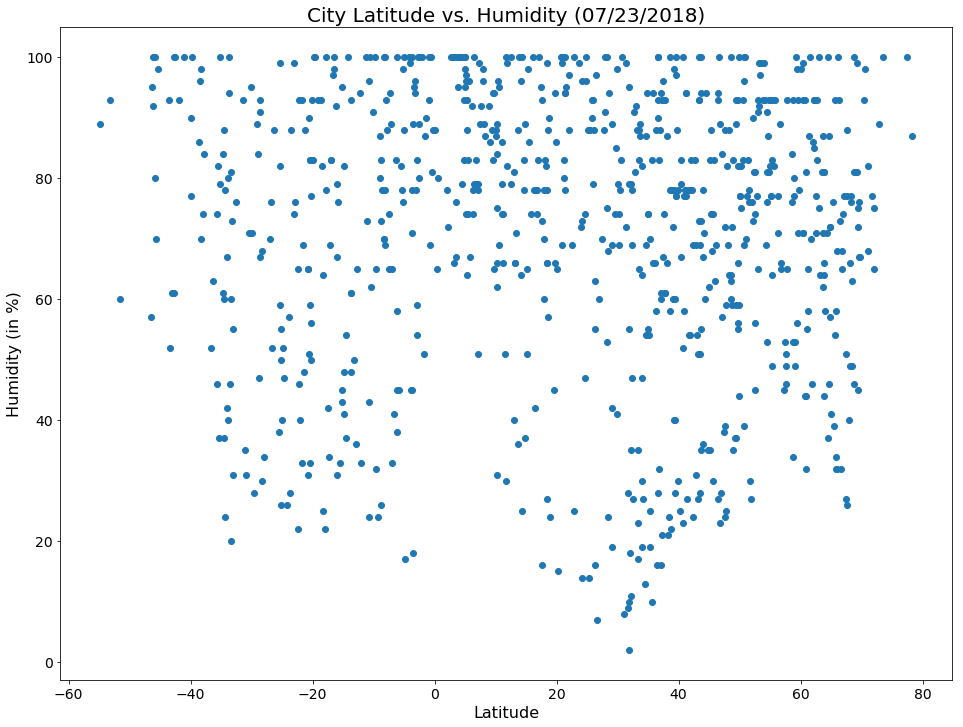

In [27]:
fig = plt.figure(figsize=(16,12))
plt.scatter(x=city_data_df['Latitude'],y=city_data_df['Humidity (in %)'])
plt.title('City Latitude vs. Humidity (07/23/2018)',fontsize=20)
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Humidity (in %)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Charts/LatHum.png")
plt.show()

# City Latitude vs. Cloudiness

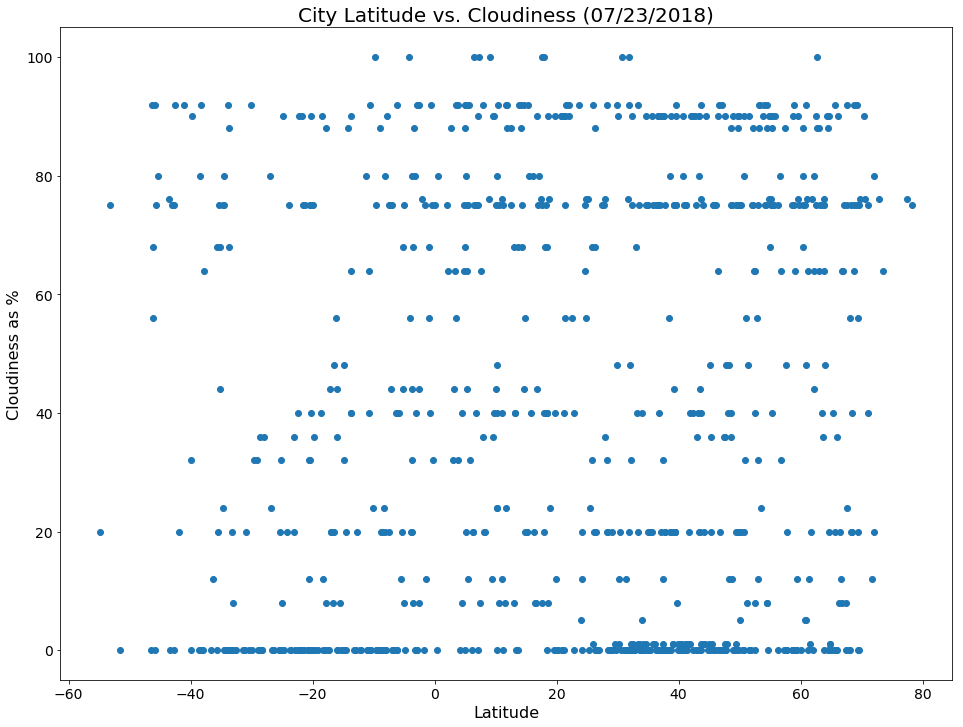

In [28]:
fig = plt.figure(figsize=(16,12))
plt.scatter(x=city_data_df['Latitude'],y=city_data_df['Cloudiness (in %)'])
plt.title('City Latitude vs. Cloudiness (07/23/2018)',fontsize=20)
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Cloudiness as %',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Charts/LatCloud.png")
plt.show()

# Latitude vs. Wind Speed

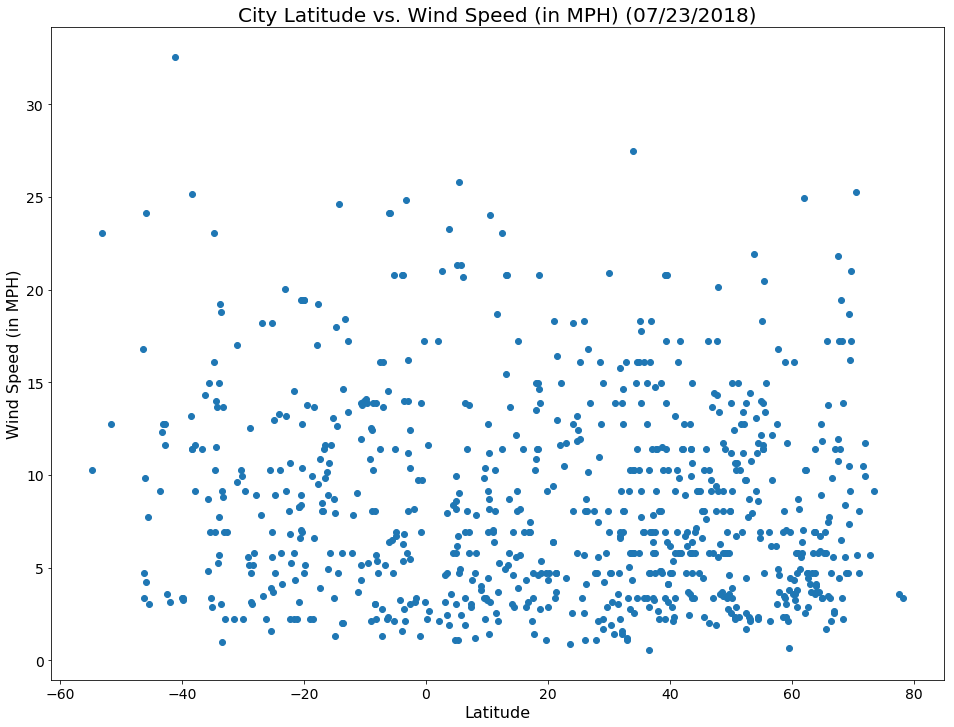

In [29]:
fig = plt.figure(figsize=(16,12))
plt.scatter(x=city_data_df['Latitude'],y=city_data_df['Wind Speed (in MPH)'])
plt.title('City Latitude vs. Wind Speed (in MPH) (07/23/2018)',fontsize=20)
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Wind Speed (in MPH)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Charts/LatWind.png")
plt.show()